In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
telco_load_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [138]:
telco_load_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [139]:
telco_load_data.shape

(7043, 21)

In [140]:
100*telco_load_data['Churn'].value_counts()/len(telco_load_data['Churn'])

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

Text(0.5, 1.02, 'Count of target variable per category')

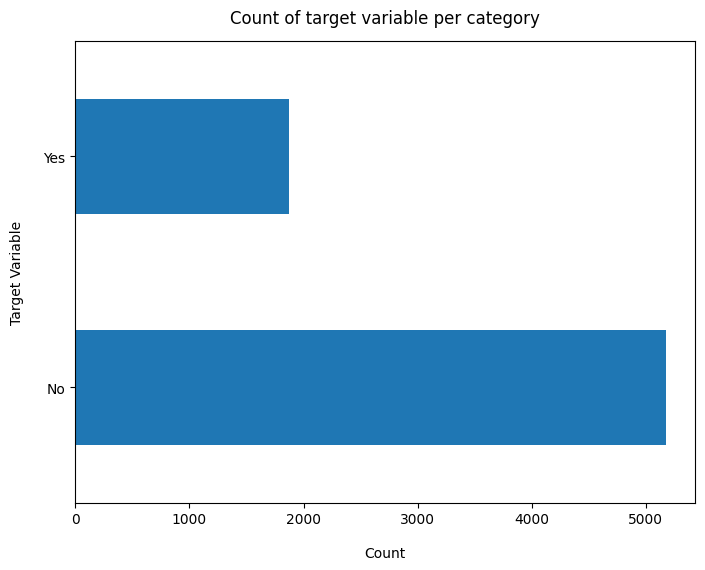

In [141]:
telco_load_data['Churn'].value_counts().plot(kind='barh',figsize=(8,6))
plt.xlabel ("Count",labelpad =14)
plt.ylabel("Target Variable", labelpad = 14)
plt.title("Count of target variable per category", y=1.02)

In [142]:
telco_load_data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

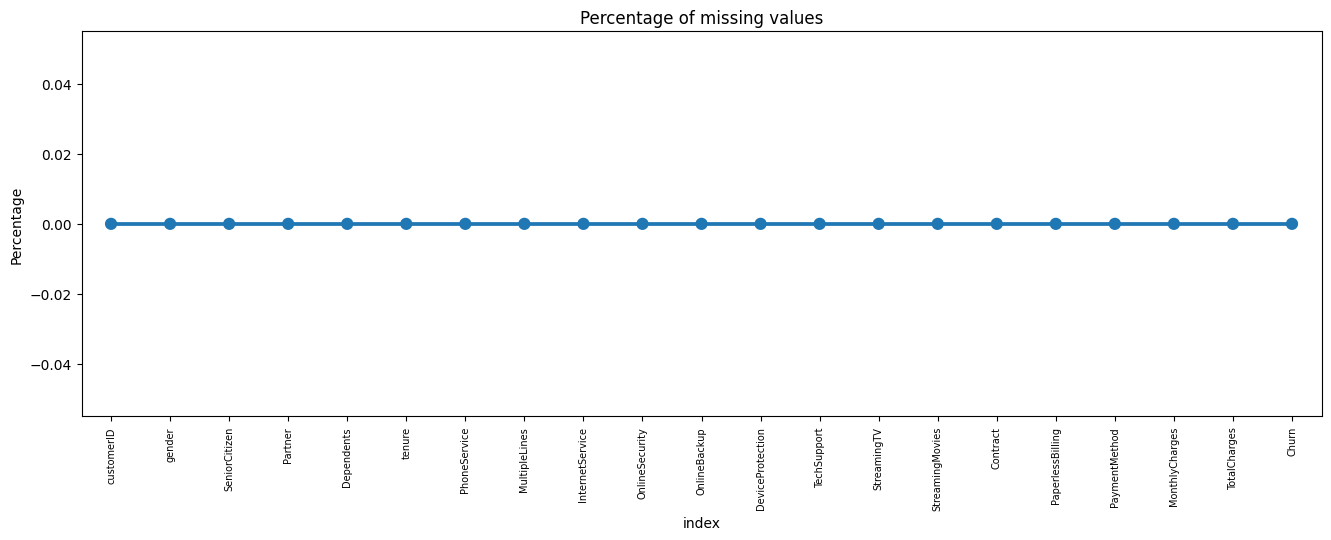

In [143]:
missing = pd.DataFrame((telco_load_data.isnull().sum())*100/telco_load_data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90, fontsize = 7)
plt.title("Percentage of missing values")
plt.ylabel("Percentage")
plt.show()

In [144]:
telco_load_data.TotalCharges = pd.to_numeric(telco_load_data.TotalCharges, errors='coerce')
telco_load_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [145]:
telco_load_data.dropna(how='any',inplace=True)

In [146]:
labels = ["{0}-{1}".format(i,i+11) for i in range(1,72,12)]
telco_load_data['tenure_group'] = pd.cut(telco_load_data.tenure, range(1,80,12),right = False)

In [147]:
telco_load_data.drop(columns=['customerID','tenure'],axis=1, inplace=True)

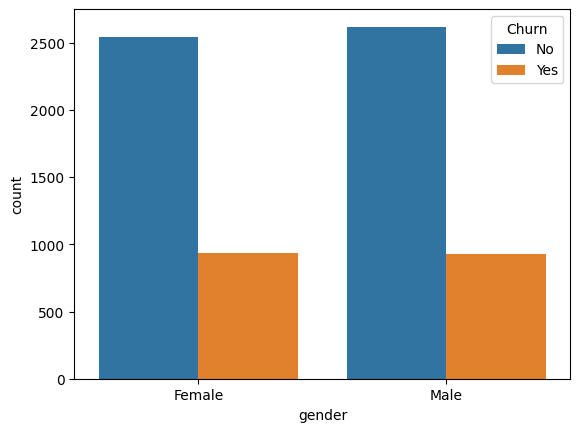

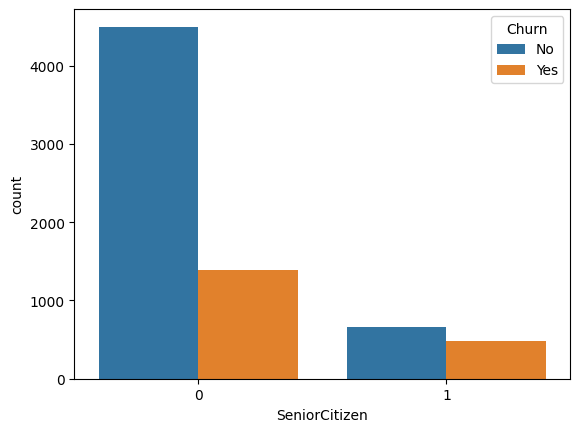

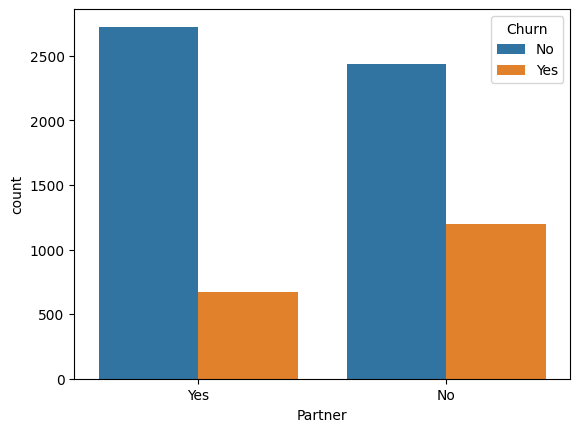

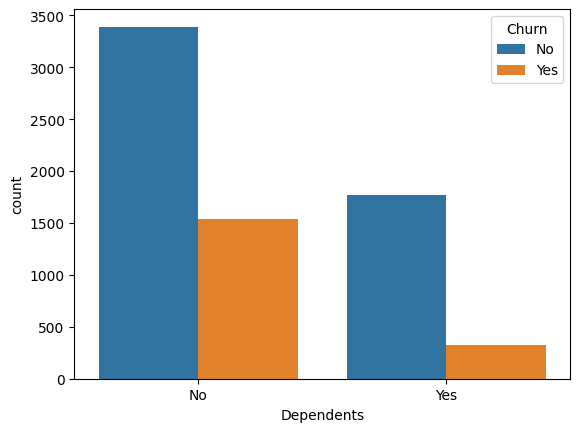

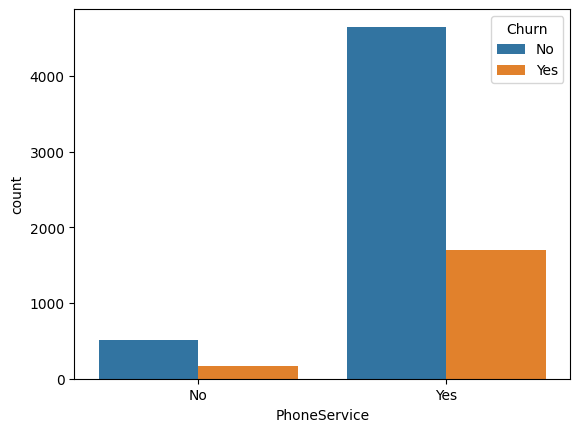

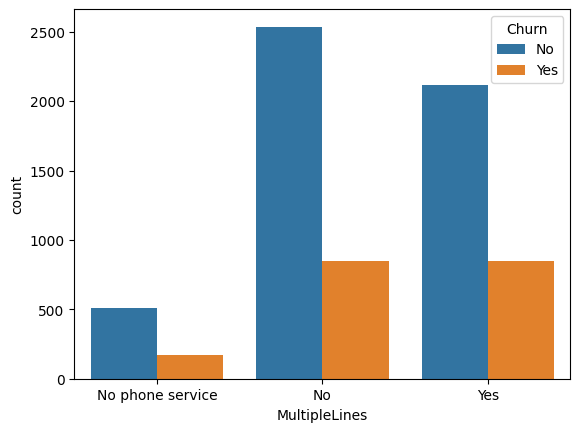

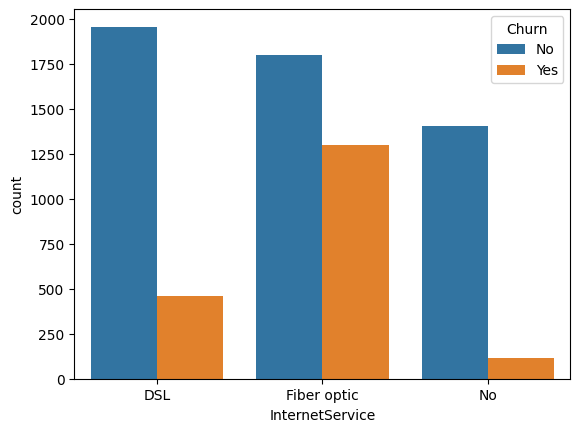

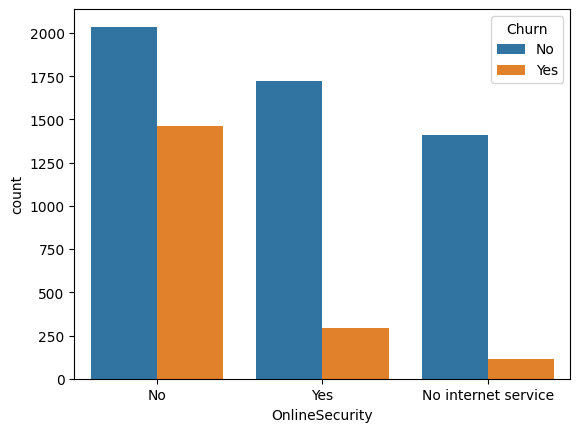

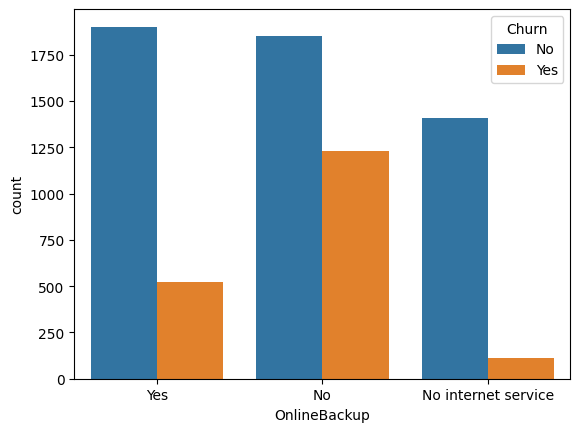

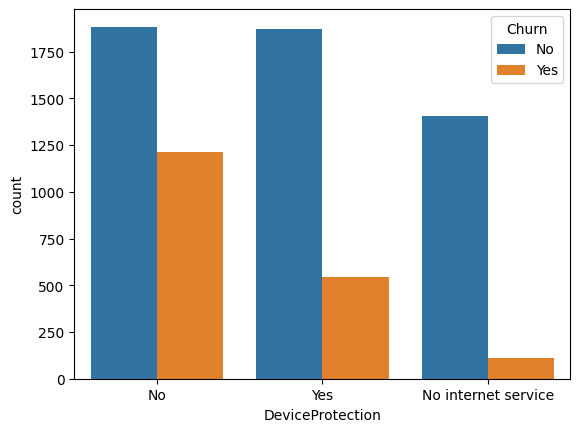

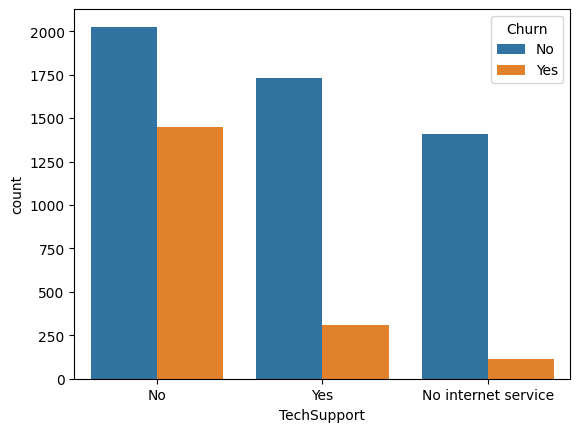

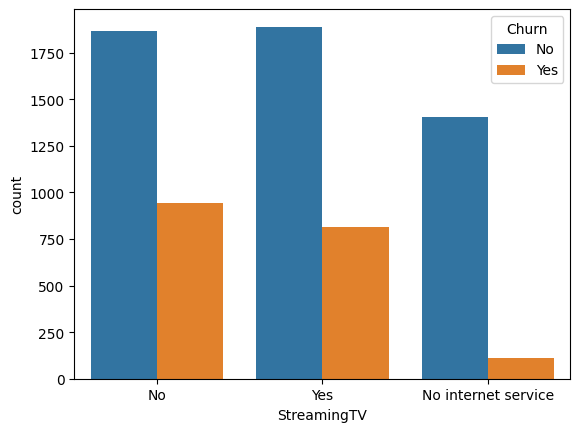

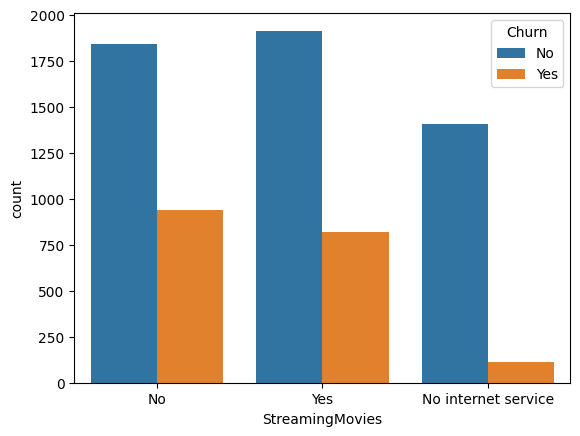

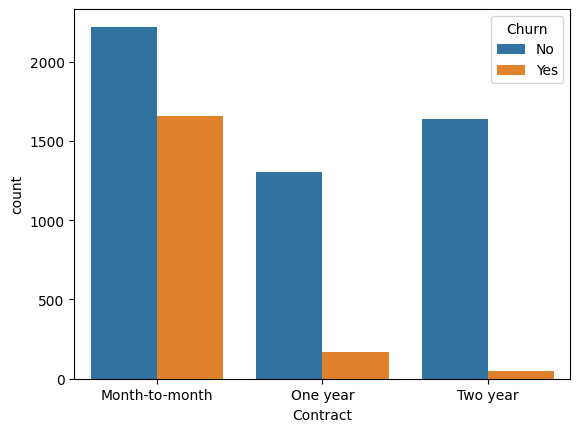

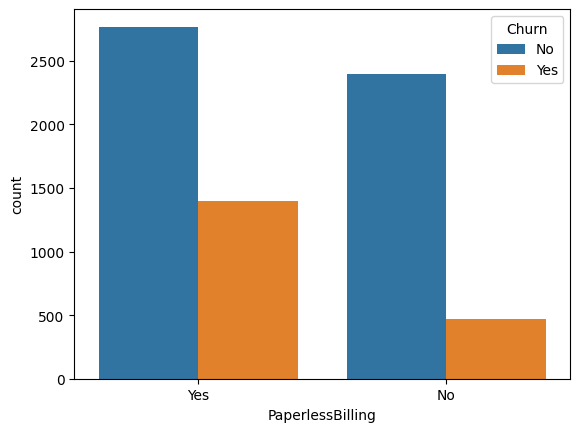

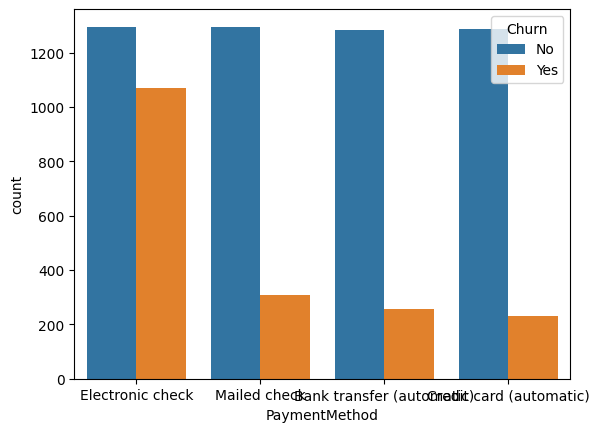

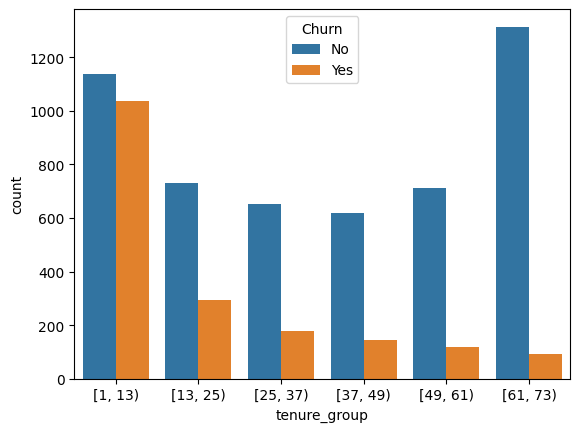

In [148]:
for i,predictor in enumerate(telco_load_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=telco_load_data,x=predictor,hue='Churn')

In [149]:
telco_load_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,"[1, 13)"
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,"[25, 37)"
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,"[1, 13)"
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,"[37, 49)"
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,"[1, 13)"


In [150]:
telco_load_data['Churn'] = np.where(telco_load_data['Churn'].eq('Yes'), 1, 0)
telco_load_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,"[1, 13)"
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,"[25, 37)"
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,"[1, 13)"
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,"[37, 49)"
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,"[1, 13)"


In [151]:
telco_load_data['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [152]:
telco_load_data_dummies = pd.get_dummies(telco_load_data)
telco_load_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,"tenure_group_[1, 13)","tenure_group_[13, 25)","tenure_group_[25, 37)","tenure_group_[37, 49)","tenure_group_[49, 61)","tenure_group_[61, 73)"
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


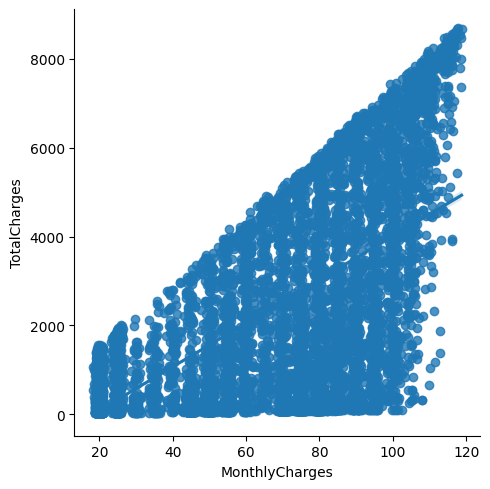

In [153]:
sns.lmplot(data=telco_load_data_dummies,x='MonthlyCharges', y='TotalCharges',fit_reg='False')

In [154]:
telco_load_data_dummies['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

Text(0.5, 1.0, 'Monthly charges by churn')

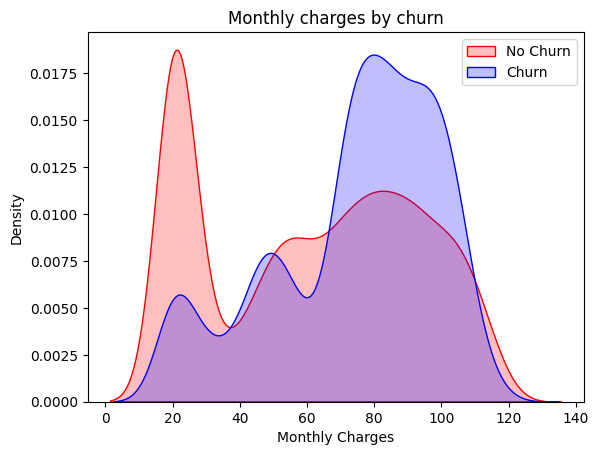

In [155]:
Mth = sns.kdeplot(telco_load_data_dummies.MonthlyCharges[(telco_load_data_dummies["Churn"] == 0) ],
                color="Red", fill = True)
Mth = sns.kdeplot(telco_load_data_dummies.MonthlyCharges[(telco_load_data_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", fill= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

Text(0.5, 1.0, 'Total charges by churn')

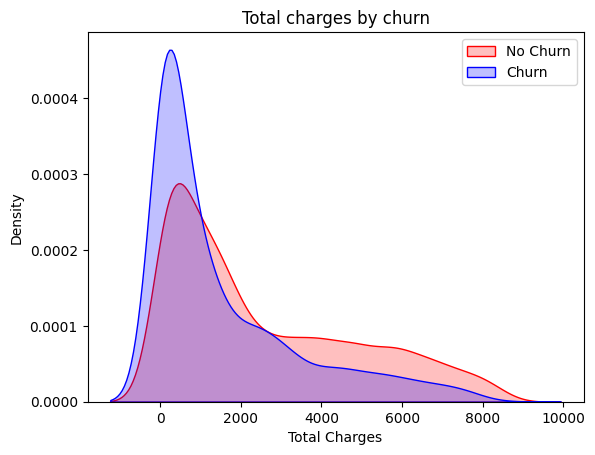

In [156]:
Tot = sns.kdeplot(telco_load_data_dummies.TotalCharges[(telco_load_data_dummies["Churn"] == 0) ],
                color="Red", fill = True)
Tot = sns.kdeplot(telco_load_data_dummies.TotalCharges[(telco_load_data_dummies["Churn"] == 1) ],
                ax =Tot, color="Blue", fill= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

<Axes: >

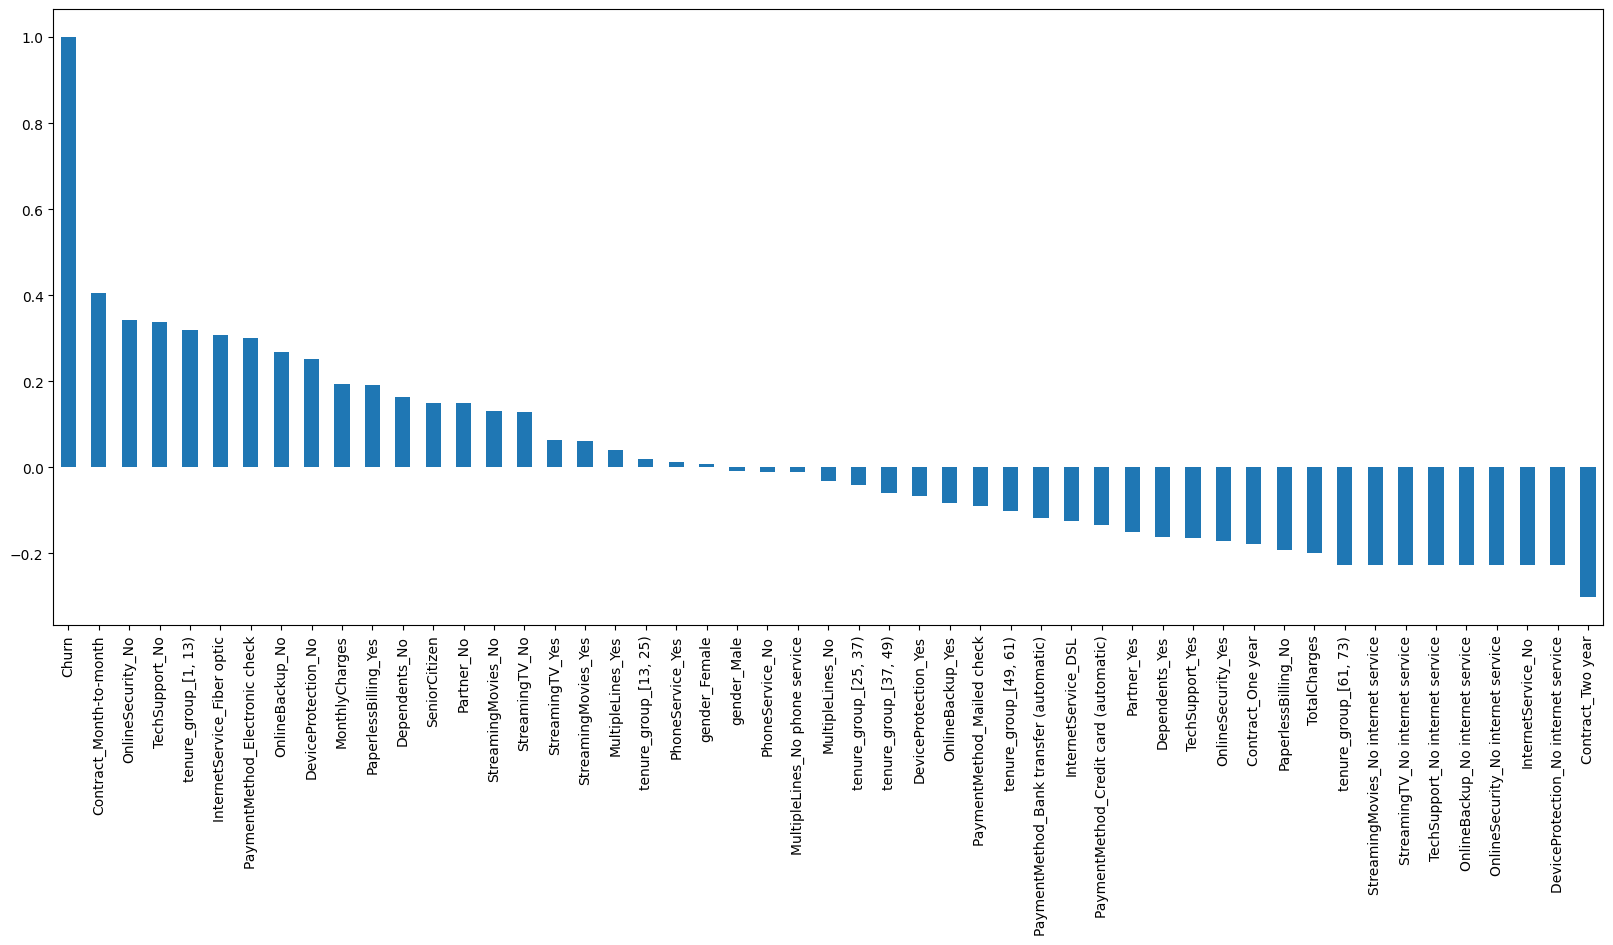

In [157]:
plt.figure(figsize=(20,8))
telco_load_data_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')


#We now build the model

In [158]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [159]:
df=telco_load_data_dummies

In [160]:
df.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,"tenure_group_[1, 13)","tenure_group_[13, 25)","tenure_group_[25, 37)","tenure_group_[37, 49)","tenure_group_[49, 61)","tenure_group_[61, 73)"
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


In [161]:
x = df.drop('Churn',axis=1)
x

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,"tenure_group_[1, 13)","tenure_group_[13, 25)","tenure_group_[25, 37)","tenure_group_[37, 49)","tenure_group_[49, 61)","tenure_group_[61, 73)"
0,0,29.85,29.85,True,False,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,False,True,True,False,True,False,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,False,True,True,False,True,False,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,False,True,True,False,True,False,True,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,True,False,True,False,True,False,False,...,False,False,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,84.80,1990.50,False,True,False,True,False,True,False,...,False,False,False,True,False,True,False,False,False,False
7039,0,103.20,7362.90,True,False,False,True,False,True,False,...,False,True,False,False,False,False,False,False,False,True
7040,0,29.60,346.45,True,False,False,True,False,True,True,...,False,False,True,False,True,False,False,False,False,False
7041,1,74.40,306.60,False,True,False,True,True,False,False,...,False,False,False,True,True,False,False,False,False,False


In [162]:
y=df['Churn']

In [163]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [164]:
dt = DecisionTreeClassifier(criterion='gini',random_state=100,max_depth=6,min_samples_leaf=8)


In [165]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [166]:
y_pred = dt.predict(x_test)

In [167]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1019
           1       0.65      0.56      0.60       388

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407



In [168]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x, y)

In [169]:
x_train,x_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.2)

In [170]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [171]:
y_pred = dt.predict(x_test)

In [172]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       518
           1       0.93      0.95      0.94       646

    accuracy                           0.93      1164
   macro avg       0.93      0.93      0.93      1164
weighted avg       0.93      0.93      0.93      1164



#We can similarly do for other models, not going in detail as I took this project up to work on my EDA skills